# Experimentation
Having written the functions required to implement estimation of $\mathcal{P}$, we now experiment with a few different model parameters.

In [1]:
include("functions.jl");

## The setup
As before, we set up the state space as the flat torus $\mathbb{T}^2$, represented by the square $[0, 2\pi] \times [0, 2\pi]$.

In [2]:
range = 2π;

In [3]:
grid_size = 100;
n_gridpoints = grid_size ^ 2;
grid = creategrid(0, range, grid_size);

## Experimentation (grid of points, grid of bases)
We can now run various experiments in which the number of datapoints is varied.

In [4]:
sample_sizes = [36, 49, 64, 81, 100];

### Varying the number of datapoints (standard map)
Varying the number of datapoints should have a significant effect on our estimation of $\mathcal{P}$, since this will alter the basis, and therefore alter the structure of the subspace in which we are estimating $\mathcal{P}$.

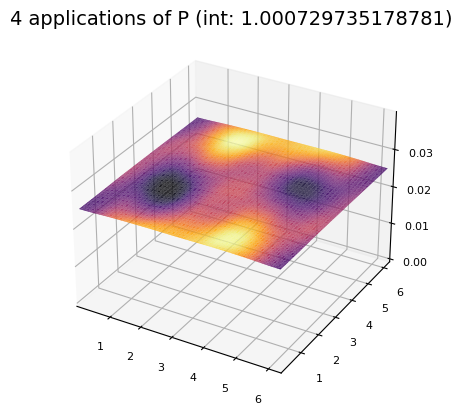

In [5]:
results_grid_stand = Vector{Dict}()
for sample_size in sample_sizes
    output = estimate_P(grid, sample_size; setup="grid", map_type="standard");
    metrics = P_diagnostics(output);
    push!(results_grid_stand, metrics);
end

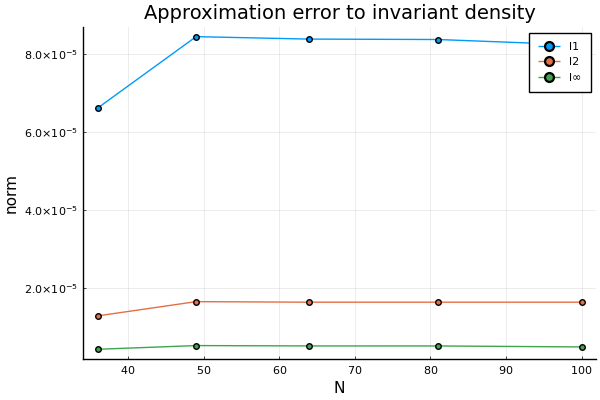

In [6]:
plot_metrics(results_grid_stand, sample_sizes, "approximation")

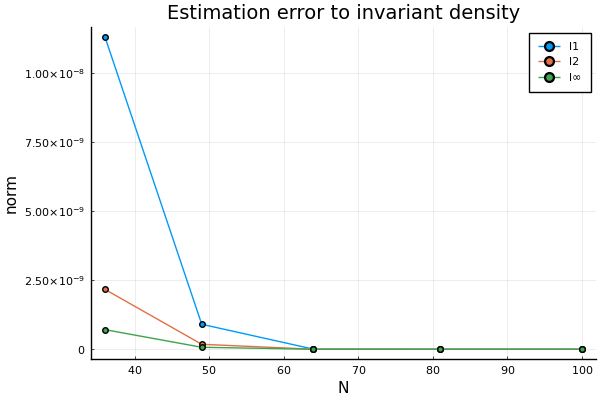

In [7]:
plot_metrics(results_grid_stand, sample_sizes, "estimation")

### Varying the number of datapoints (cat map)
We expect similar results for the cat map.

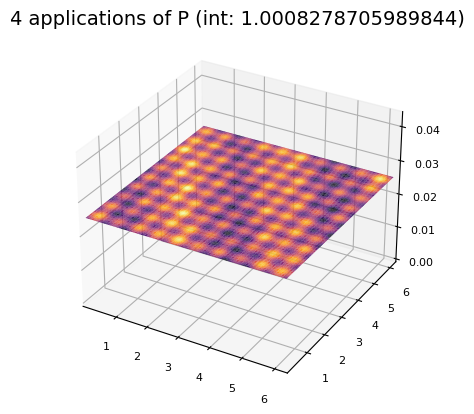

In [8]:
results_grid_cat = Vector{Dict}()
for sample_size in sample_sizes
    output = estimate_P(grid, sample_size; setup="grid", map_type="cat");
    metrics = P_diagnostics(output);
    push!(results_grid_cat, metrics);
end

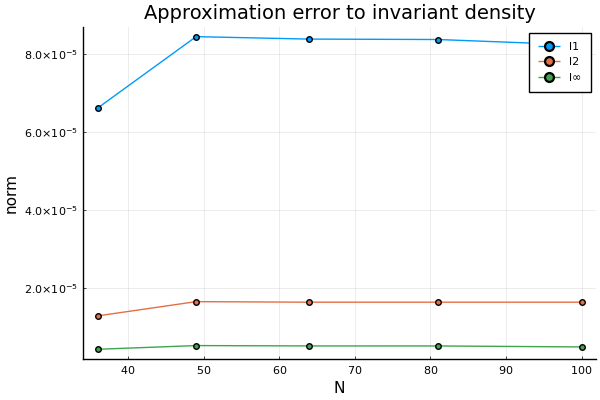

In [9]:
plot_metrics(results_grid_cat, sample_sizes, "approximation")

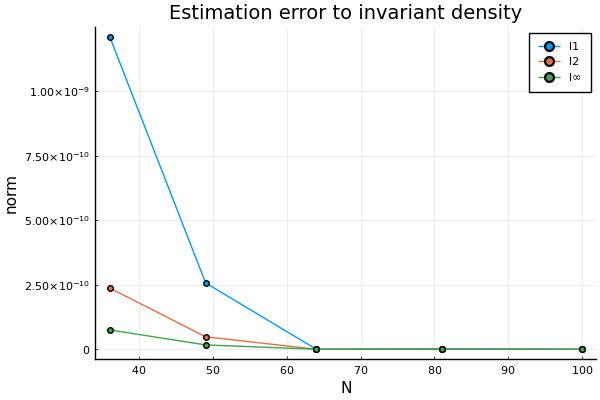

In [10]:
plot_metrics(results_grid_cat, sample_sizes, "estimation")

## Experimentation (scattered points, scattered bases)
In varying the number of datapoints in the scattered case, we expect an even greater effect, since the number of datapoints will drive coverage of the state space.

In [11]:
sample_sizes = [50, 100, 150, 200, 250, 300];

### Varying the number of datapoints (standard map)


Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2550 columns and 127500 nonzeros
Model fingerprint: 0xb2aec949
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 4e+00]
Presolve time: 0.05s
Presolved: 2500 rows, 2550 columns, 127500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 50
 AA' NZ     : 1.250e+05
 Factor NZ  : 1.575e+05 (roughly 3 MBytes of memory)
 Factor Ops : 9.924e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6

Objective value is: 0.4556725456568529
Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2750 columns and 530519 nonzeros
Model fingerprint: 0x7041275f
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.15s
Presolved: 2500 rows, 2750 columns, 530519 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 250
 AA' NZ     : 5.280e+05
 Factor NZ  : 5.619e+05 (roughly 9 MBytes of memory)
 Factor Ops : 1.179e+08 (less than 1 second per iteration)
 Threads    : 2

                

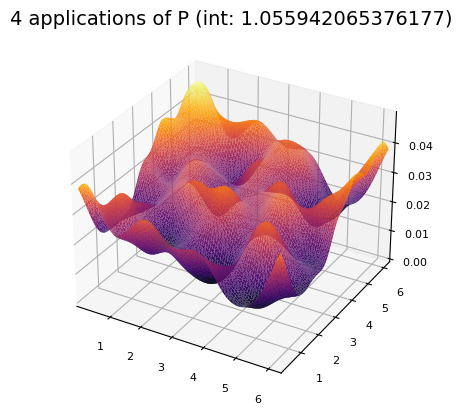

1.4797734137569023


In [12]:
results_scatt_stand = Vector{Dict}()
for sample_size in sample_sizes
    output = estimate_P(grid, sample_size; setup="scattered", map_type="standard");
    metrics = P_diagnostics(output);
    push!(results_scatt_stand, metrics)
end

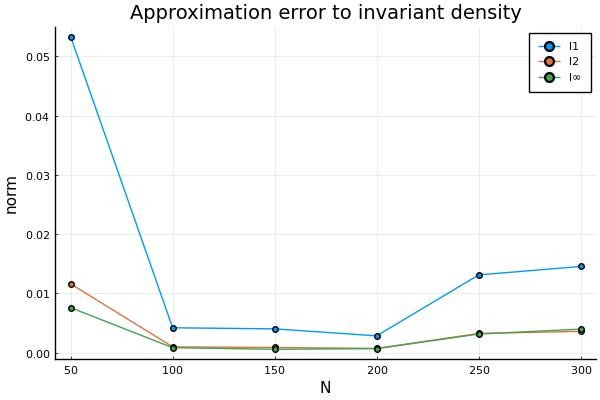

In [13]:
plot_metrics(results_scatt_stand, sample_sizes, "approximation")

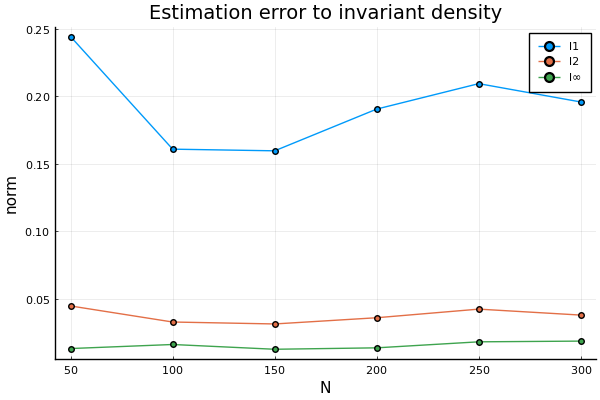

In [14]:
plot_metrics(results_scatt_stand, sample_sizes, "estimation")

### Varying the number of datapoints (cat map)

Academic license - for non-commercial use only - expires 2021-08-05
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2550 columns and 127500 nonzeros
Model fingerprint: 0xbdab82cf
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-07, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 4e+00]
Presolve time: 0.03s
Presolved: 2500 rows, 2550 columns, 127500 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 50
 AA' NZ     : 1.250e+05
 Factor NZ  : 1.575e+05 (roughly 3 MBytes of memory)
 Factor Ops : 9.924e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   6

Objective value is: 0.04074163815130305
Academic license - for non-commercial use only - expires 2021-08-05
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2500 rows, 2750 columns and 569543 nonzeros
Model fingerprint: 0xffffb2c5
Model has 2500 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e-13, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.15s
Presolved: 2500 rows, 2750 columns, 569543 nonzeros
Presolved model has 2500 quadratic objective terms
Ordering time: 0.02s

Barrier statistics:
 Dense cols : 250
 AA' NZ     : 5.670e+05
 Factor NZ  : 6.010e+05 (roughly 10 MBytes of memory)
 Factor Ops : 1.351e+08 (less than 1 second per iteration)
 Threads    : 2

              

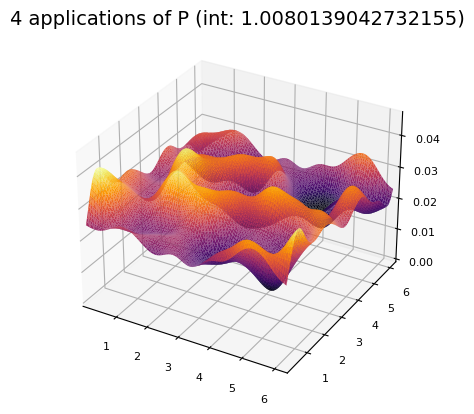

0.4381983447192397


In [15]:
results_scatt_cat = Vector{Dict}()
for sample_size in sample_sizes
    output = estimate_P(grid, sample_size; setup="scattered", map_type="cat");
    metrics = P_diagnostics(output);
    push!(results_scatt_cat, metrics)
end

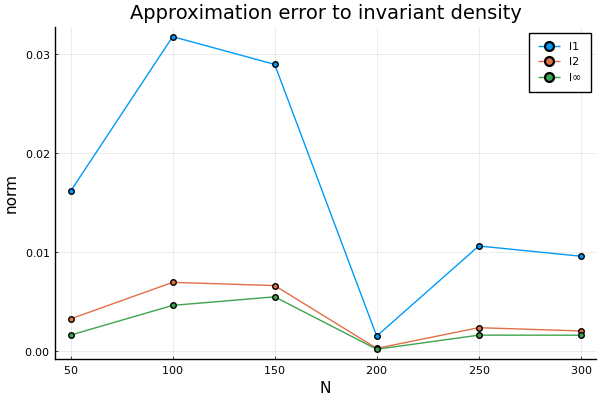

In [16]:
plot_metrics(results_scatt_cat, sample_sizes, "approximation")

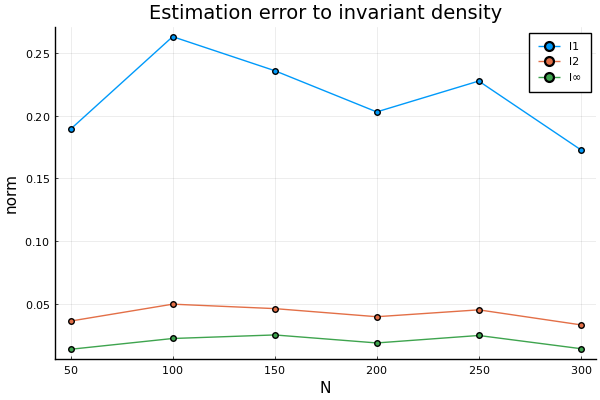

In [17]:
plot_metrics(results_scatt_cat, sample_sizes, "estimation")